# Improper Integrals
© Kelly McQuighan 2017

## Introduction: Integrals and the Fundamental Theorem of Calculus

Recall the **Fundamental Theorem of Calculus (FTC)**:

**Theorem (FTC)**

*Let* $f(x)$ *be a continuous function on a finite interval* $[a,b]$ *(that is,* $a>-\infty$ *and* $b<\infty$*) and let *$F(x)$* be any function satifying *$\frac d{dx} F(x) = f(x)$* ( that is, *$F(x)$* is an antiderivative of *$f(x)$*). Then*

$$
\lim_{n\to\infty}\sum_{i=1}^n f\left(a+\frac{i(b-a)}{n} \right)\cdot\left(\frac{b-a}{n}\right) = F(b)-F(a)
$$

We **define** the left-hand side of the above equation to be the definite integral $\int_a^b f(x)dx$. The equality of the left and right hand sides (i.e. the relationship between antiderivatives and integrals) is **only true** because of the FTC. 

### A quick animation of the definition of an integral

The simulation below reminds you of what it means for the integral to be a limit of Riemann sums. The notebook relies on Python code. To initialize the notebook select **Cell->Run All Below**

**Do:** Pick values of a and b and a function f to integrate. Vary the number of left Riemann rectangles that are used to approximate the area. 

**Consider:** Do the sums converge as you take $n$ larger? Do they converge to the value you expect based on the Fundamental Theorem of Calculus?

Some quick explanations of how the notebook works:

**The meaning of the variables are as follows:**
- "a": the left endpoint of the integration interval.
- "b": the right endpoint of the integration interval.
- "f(x)": the function to integrate. 
- "n": the number of left Riemann rectangles

In [1]:
from ipywidgets import interact, Text, IntSlider, FloatSlider
import ipywidgets as widgets
%matplotlib inline
import ImpropIntTools as IT

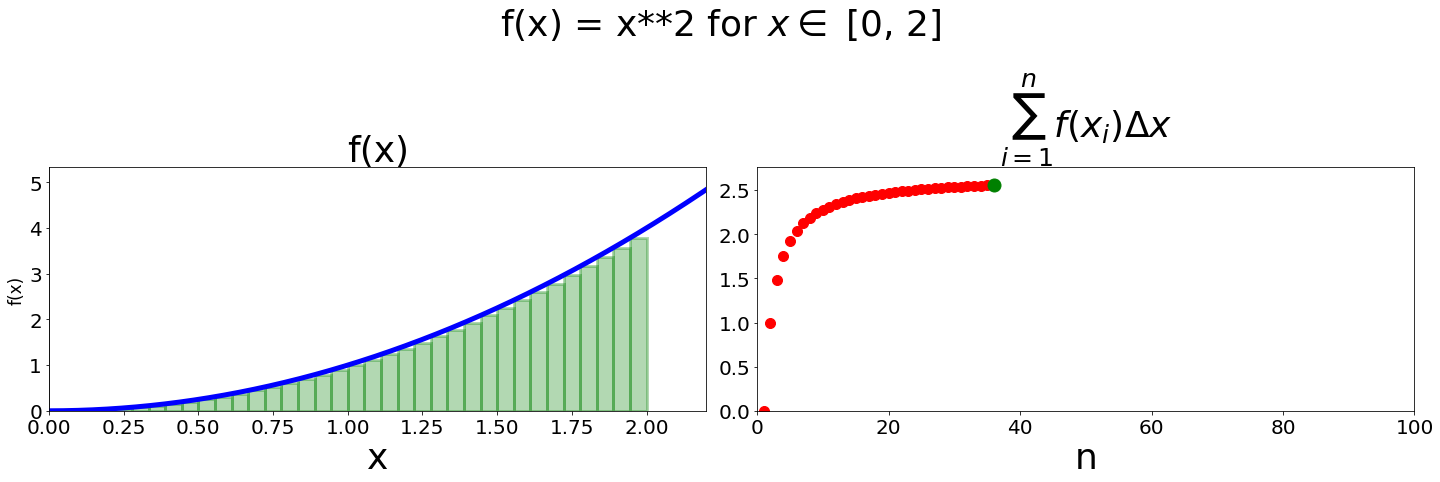

In [2]:
#DO NOT CHANGE ANYTHING IN THIS BOX
f_box = Text(value="x**2", description=r'$f(x)=$')
n_slider = IntSlider(min=1, max=100, step=1, value=4)
interact(IT.plotIntegralApprox, f=f_box, a="0.0", b="2.0", n=n_slider);

## Introduction II

In the statement of the FTC above I defined the integral in terms of a limit of **Left Riemann sums**. One might instead want to use Right Riemann sums, sums computed using the midpoint, or any combination. In fact we define  

$$
\int_a^b f(x)dx:=\lim_{n\to\infty}\sum_{i=1}^n f\left(x_i \right)\cdot\left(\frac{b-a}{n}\right)
$$

where $x_i$ is **any** point in the interval $\left[a+\frac{i(b-a)}{n},a+\frac{(i+1)(b-a)}{n}\right]$. 

It will be important to remember that the integral is well defined **only** if the right hand side of this definition **does not depend** on the choice of $x_i$.

### Shortcomings of the FTC

There are two cases not covered by the FTC; in both cases the issue is that the integral is not defined.

(1) $a=-\infty$ and/or $b=\infty$. The issue is that the intervals in the Riemann sum are not well defined. For example: how do you draw even two Riemann rectangles to approximate $\int_1^\infty \frac{dx}{x^2}$? Where does the first interval $\left[a,a+\frac{(\infty-a)}{2}\right]$ end and the second interval $\left[a+\frac{(\infty-a)}{2},\infty\right)$ begin?

(2) f(x) is not continuous. The issue is that the height of the Riemann rectangles are not well defined if whenever they are evaluated at a discontinuity. For example: how would you draw the first Left Riemann rectangle to approximate $\int_0^1 \frac{dx}{\sqrt x}$? 

### These are real problems

In case (1) you might be tempted to think "Well, what I really care about is the limit as $n\to\infty$ so what does it matter if I can't define the approximation for a finite $n$?". This thought **completely misunderstands** what "infinity" means: **infinity is not a number** so you can't just "plug-in" infinity in the definition of an integral and then "evaluate" the result. **By definition** $\lim_{n\to\infty}$ meann: "Set $n$ to larger and larger values and evaluate; if the result converges to some number then the limit is defined as that number." Thus, if we can not evaluate the an expression for any finite $n$, we **can't even begin** the process of understanding the limit. 

In case (2) you might be tempted to think you can avoid the issue by making a tricky choice of Riemann sum (like using right Riemann sums in the example above). However, this is **not** valid since the limit 

$$
\lim_{n\to\infty}\sum_{i=1}^n f\left(x_i\right)\cdot\left(\frac{b-a}{n}\right)
$$

does not make any sesnse if the right hand side depends on how you choose $x_i$!

### A counter-example

Before you start to think that this is all nonsense created by math professors to torture you with, consider the following counter-example:

$$
\int_{-1}^1 \frac{dx}{x^2}.
$$

Since $\frac1{x^2}$ is positive the integral **must** be positive (the area under a positive function is, by definition, positive). However, a naive use of the FTC gives the following:

$$
\int_{-1}^1 \frac{dx}{x^2} = -\frac1x\big|_{x=-1}^1 = -\left[1-(-1)\right] = -2 < 0!!
$$

What went wrong? The computations are all correct, the problem is that the FTC **does not apply** to this example due to the discontinuity at $x=0$. 

## Overview of this notebook

The purpose of this notebook is to introduce you how we deal with problematic integrals like the examples above in the mathematically correct way. Such integrals are called **improper** because they do not make sense based on the **definition** of an integral. We will need to use limits in order to compute them. We consider two different cases:

(1) Infinite Intervals $\int_a^\infty f(x)dx$

(2) Infinite Ingrands $\int_0^b g(x)dx$ where $g(0) = \infty$

## Infinite Intervals

Investigate the limit
$$\lim_{b\to\infty}\int_a^b f(x)dx$$
numerically by choosing larger values of $b$, respectively.

**Do:** Pick values of b and a function f to integrate. 

**Consider:** What seems to be necessary to ensure that the integral converges as $b\to\infty$?

Some quick explanations of how the notebook works:

**The meaning of the variables are as follows:**
- "a": the left endpoint of the integration interval.
- "b": the right endpoint of the integration interval.
- "f(x)": the function to integrate. 

**Some functions to try**
- 1.-exp(-x/10.)
- sin(x)
- 1./x**0.5
- 1./x**2

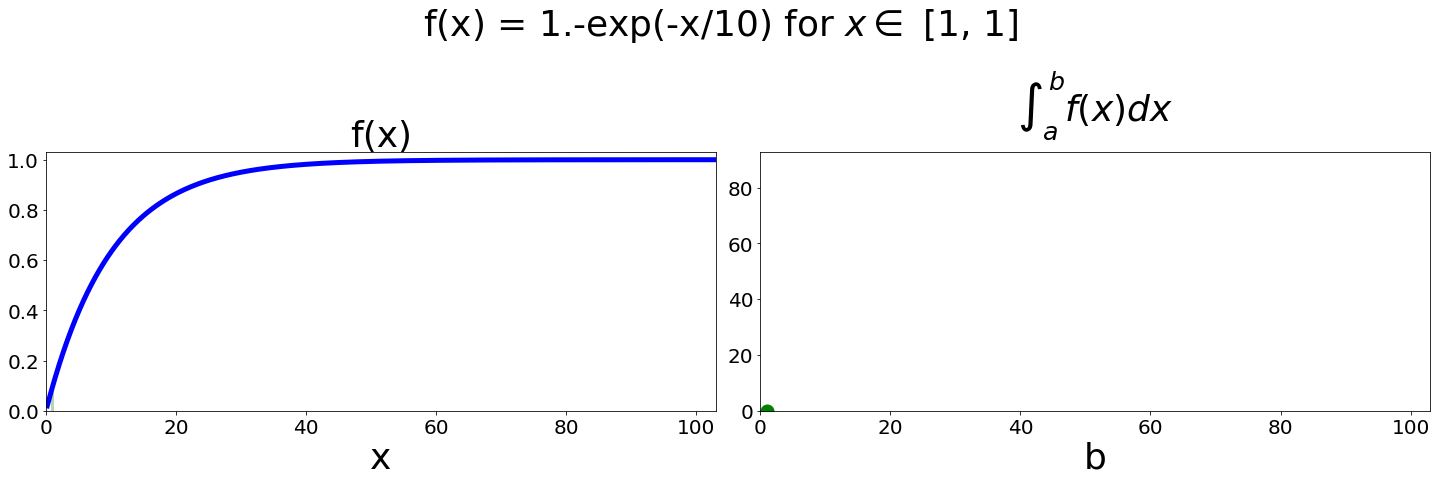

In [3]:
#DO NOT CHANGE ANYTHING IN THIS BOX
f_box = Text(value="1.-exp(-x/10)", description=r'$f(x)=$')
b_slider = FloatSlider(min=1, max=100, step=1, value=1)
interact(IT.plotINFInterval, f=f_box, a="1.", b=b_slider);

### Summary

You should have found that a **necessary** condition for $\lim_{b\to\infty} \int_a^b f(x)dx$ to converge is that $\lim_{x\to\infty} f(x) = 0$. However, this is not a **sufficient** condition: $\int_1^\infty \frac{dx}{x^2}$ converges but $\int_1^\infty \frac{dx}{\sqrt x}$ does not. The issue is that we need $\lim_{x\to\infty} f(x)$ to approach zero **quickly enough**. 

## Unbounded integrands

Next investigate the integrals of functions which become unbounded at $x=0$ by examining the limit
$$\lim_{a\to0^+}\int_a^b g(x)dx$$

**Do:** Pick values of a and b, a function g to integrate. 

**Consider:** What seems to be necessary to ensure that the integral converges as $a\to0$?

Some quick explanations of how the notebook works: There is a technical issue that we want to be comparing **orders of magnitude** of $a$; i.e., we want to understand how whether the integral converges as we consider $a=0.1$, $a=0.01$, $a=0.001$, and so on (rather than $a=0.03$, $a=0.02$, $a=0.01$, etc). The best way to do this is to consider $a=10^m$ and vary $m$ rather than $a$.

**The meaning of the variables are as follows:**
- "$\log_{10} a$": the power for the left endpoint of the integration interval. I.e. if $m=\log_{10} a$ then $a=10^m$. 
- "b": the right endpoint of the integration interval to start. 
- "g(x)": the function to integrate which has an infinite singularity at $x=0$ but nowhere in $[a,b]$

In order to make the convergence really clear, a third plot is shown where the horizontal axis is on a **log-scale**.

**Some functions to try**
- 1./x\*\*2 
- 1./x\*\*0.5 
- tan(x+pi/2) 

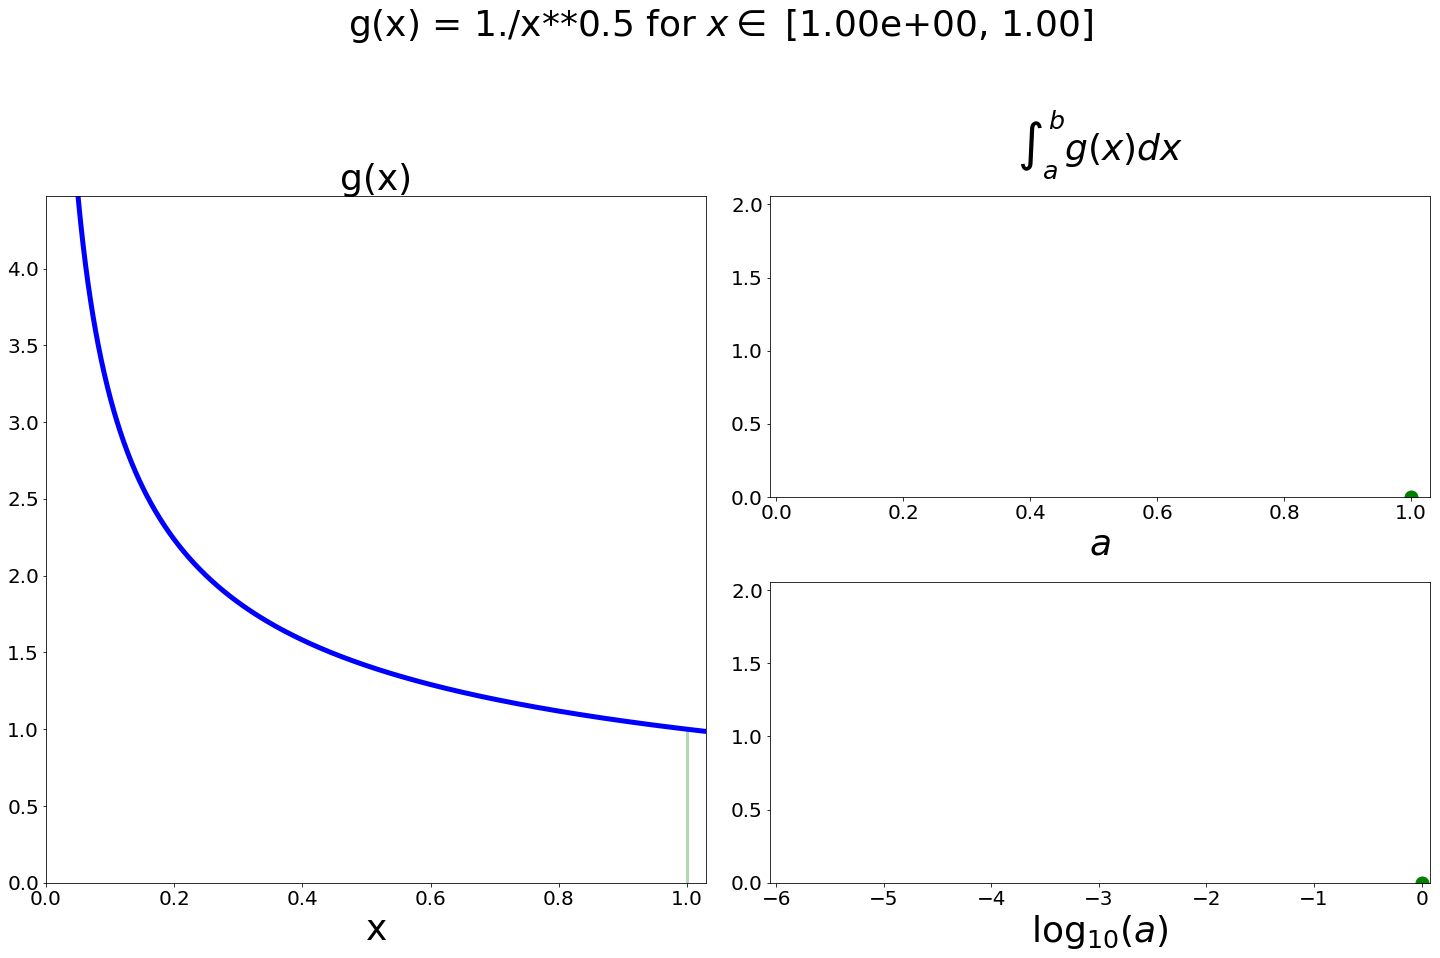

In [4]:
#DO NOT CHANGE ANYTHING BELOW HERE
g_box = Text(value="1./x**0.5", description=r'$g(x)=$')
m_slider = widgets.FloatSlider(min=-6., max=0., step=0.1, value=0., description=r'$\log_{10} a$')
interact(IT.plotINFIntegrand,g=g_box,m=m_slider,b="1.");

### Summary

You should have found that it is possible for $\lim_{a\to0+} \int_a^b f(x)dx$ to converge provided that $\lim_{x\to0+} f(x)$ does not blow-up **too quickly**. This is why $\int_0^1 \frac{dx}{\sqrt x}$ converges but $\int_0^1 \frac{dx}{x^2}$ does not. Note that this is the opposite from what you found for the infinite interval case!

## Final Comments

When these limits converge we **define** the **improper** integrals

$$\int_a^\infty f(x)dx:=\lim_{b\to\infty}\int_a^b f(x)dx$$

and

$$\int_c^b g(x)dx:=\lim_{a\to c+}\int_a^b g(x)dx$$

where $g(x)$ is discontinuous at $x=c$ (not necessarily 0!). 
These ideas can be extended to integrals of the form

$$\int_{-\infty}^b f(x)dx\qquad \int_{-\infty}^\infty f(x)dx \qquad \int_a^c g(x)dx\qquad \int_a^b g(x)dx$$

The last integral is important to keep in mind because the discontinuity is "hidden" in the interior of the interval of integration. This is what went wrong with the counter example $\int_{-1}^1 \frac {dx}{x^2}$. We will discuss all of these extenions in class.